In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null value in the dataset

In [7]:
#Statisticial Summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


key obseravtions:
1. the mean is more than median(50th percentile) in all columns
2. there is large difference in 75% percentile and max in residual sugar,free sulphar dioxide, total sulphar dioxide
3. the 1 n 2 observation suggest that there are extreme outliers in all this 3 cols

In [8]:
#Exploring data variable
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

target/dependent variable is discrete and categorical in nature

quality score scale range from 3 to 8
3=low
8=best

observations:
 most values concentrated in 5,6,7.
 few are present in 3 and 4

Data Visualization:


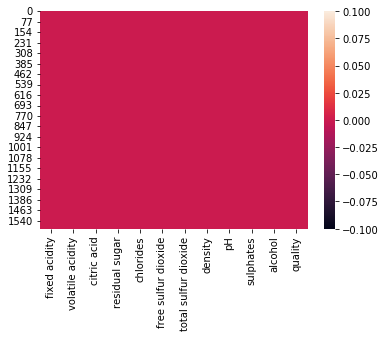

In [10]:
#checking missing values
sns.heatmap(df.isnull())

The dataset has no missing values.

In [11]:
dfcor=df.corr()    #checking correlation
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


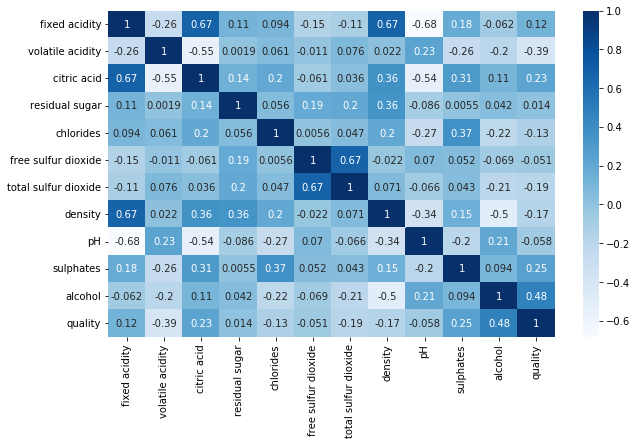

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap="Blues",annot=True)

light shades are highly correlated
quality is highly correlated with alcohol
alcohol is highly negatively correlated with density with -0.5
density is highly positively correlated with residual sugar
volatile acidity is negatively correlated with quality
free sulphuric acid is highly correlated with total sulphar dioxide

plotting outliers:

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

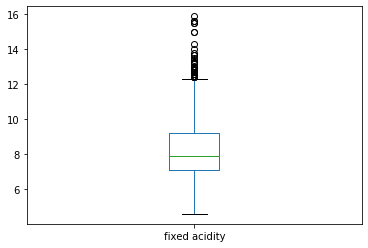

In [14]:
#univariate analysis
df['fixed acidity'].plot.box()

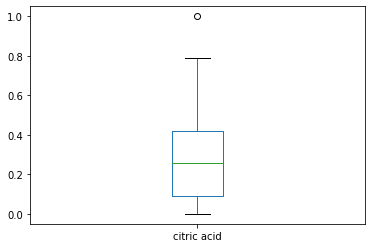

In [15]:
df['citric acid'].plot.box()

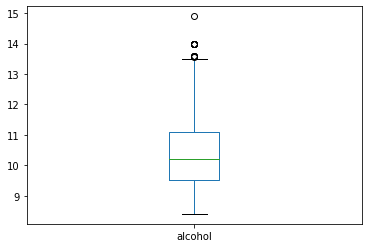

In [16]:
df['alcohol'].plot.box()

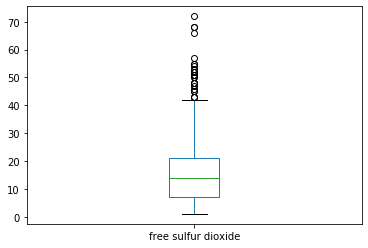

In [17]:
df['free sulfur dioxide'].plot.box()

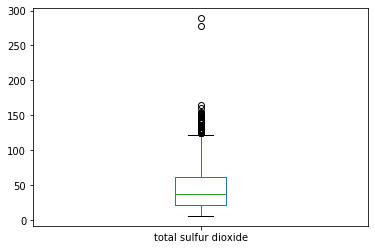

In [18]:
df['total sulfur dioxide'].plot.box()

From the above, outliers are present in the dataset

In [19]:
#checking skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

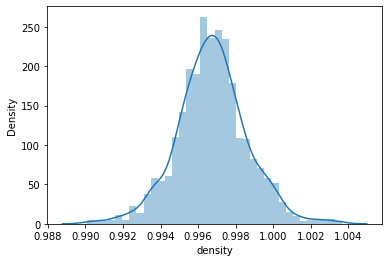

In [20]:
sns.distplot(df['density'])

data is normally distributed

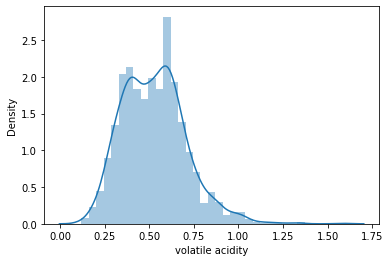

In [21]:
sns.distplot(df['volatile acidity'])

Little skewness is present

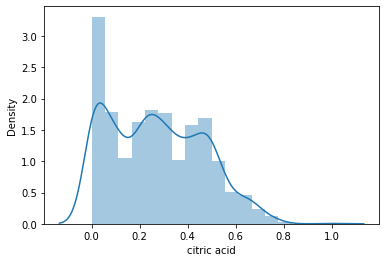

In [22]:
sns.distplot(df['citric acid'])

little skewness is present

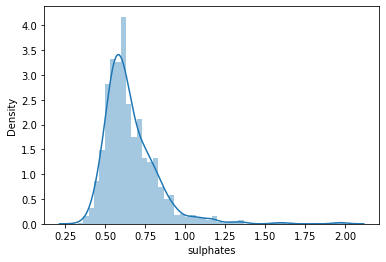

In [23]:
sns.distplot(df['sulphates'])

skewness is present in most of the columns

In [24]:
#data cleaning

df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

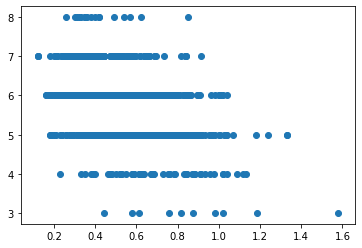

In [25]:
plt.scatter(df['volatile acidity'],df['quality'])
plt.show()

droping volatile acidity column has it doesnt correlated much with quality column and dropping it wont affect any results

In [26]:
df.drop('volatile acidity',axis=1,inplace=True)
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
df.shape

(1599, 11)

In [28]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 1.39147228, 0.45321841, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.39147228, 0.04341614, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.18607043, 0.16942723, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.72391627, 0.16942723, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.77526673, 0.38227061, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.02199944, 0.75289408, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [29]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
        291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
        396,  400,  400,  442,  442,  451,  459,  467,  480,  480,  494,
        515,  517,  544,  554,  554,  555,  555,  557,  557,  568,  584,
        588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
        652,  652,  672,  684,  690,  692,  692,  695,  723,  730,  754,
        776,  777,  795,  821,  832,  836,  837,  889,  899,  911,  917,
        923,  925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074,
       1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186,
       1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288,
       1289, 1295, 1296, 1299, 1300, 1316, 1319, 1

In [30]:
dfnew=df[(z<3).all(axis=1)]
dfnew

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
dfnew.shape

(1458, 11)

Almost 141rows has been dropped

In [32]:
#balancing the dataset

In [33]:
dfnew.quality.value_counts()

5    621
6    586
7    185
4     50
8     16
Name: quality, dtype: int64

In [34]:
x=dfnew.iloc[:,0:-1]

In [35]:
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [36]:
y=dfnew.iloc[:,-1]

In [37]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1458, dtype: int64

In [38]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


ERROR: Could not find a version that satisfies the requirement scikit-learn>=1.1.0 (from imbalanced-learn->imblearn) (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0b1, 0.15.0b2, 0.15.0, 0.15.1, 0.15.2, 0.16b1, 0.16.0, 0.16.1, 0.17b1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19b2, 0.19.0, 0.19.1, 0.19.2, 0.20rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21rc2, 0.21.0, 0.21.1, 0.21.2, 0.21.3, 0.22rc2.post1, 0.22rc3, 0.22, 0.22.1, 0.22.2, 0.22.2.post1, 0.23.0rc1, 0.23.0, 0.23.1, 0.23.2, 0.24.dev0, 0.24.0rc1, 0.24.0, 0.24.1, 0.24.2, 1.0rc1, 1.0rc2, 1.0, 1.0.1, 1.0.2)
ERROR: No matching distribution found for scikit-learn>=1.1.0 (from imbalanced-learn->imblearn)


import imblearn


from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(x,y)
ytrain

In [64]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score

In [45]:
from sklearn.tree import DecisionTreeClassifier


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [47]:
dt=DecisionTreeClassifier()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
pred=dt.predict(x_test)
print('accuracy score :',accuracy_score(y_test,pred))
confusion_matrix(y_test,pred)

accuracy score : 0.6278538812785388


array([[  2,   9,   9,   2,   1],
       [  2, 126,  49,   9,   0],
       [  2,  33, 113,  11,   3],
       [  0,   7,  19,  33,   2],
       [  0,   0,   3,   2,   1]], dtype=int64)

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.33      0.09      0.14        23
           5       0.72      0.68      0.70       186
           6       0.59      0.70      0.64       162
           7       0.58      0.54      0.56        61
           8       0.14      0.17      0.15         6

    accuracy                           0.63       438
   macro avg       0.47      0.43      0.44       438
weighted avg       0.62      0.63      0.62       438



In [56]:
p=np.array([7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4])
p=p.reshape(1,-1)
p.shape

(1, 10)

In [57]:
dt.predict(p)

array([5], dtype=int64)

In [58]:
def test_pred(p):
    p=p.reshape(1,-1)
    val=dt.predict(p)
    if val>=7:
        print('good quality')
    elif val<7:
        print('not good quality')
    

In [59]:
p=np.array([7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4])
test_pred(p)

not good quality


using decision tree regressor for regularization

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred=dtr.predict(x_test)
print(dtrpred)

dtr.score(x_test,y_test)

[5. 5. 7. 5. 6. 5. 6. 6. 6. 7. 7. 5. 5. 7. 7. 5. 7. 5. 6. 5. 6. 6. 6. 6.
 6. 5. 5. 7. 5. 5. 7. 5. 5. 6. 6. 6. 5. 5. 7. 7. 6. 6. 6. 6. 5. 6. 5. 6.
 7. 6. 5. 6. 6. 5. 5. 5. 6. 6. 5. 5. 6. 5. 5. 5. 5. 5. 6. 7. 6. 6. 5. 6.
 8. 5. 5. 5. 5. 6. 7. 6. 5. 5. 5. 5. 4. 5. 7. 6. 5. 6. 7. 5. 6. 6. 6. 6.
 5. 6. 6. 6. 5. 6. 5. 4. 6. 5. 6. 5. 6. 5. 7. 5. 6. 5. 7. 6. 4. 5. 6. 5.
 8. 5. 6. 6. 5. 6. 5. 5. 6. 7. 5. 6. 5. 7. 5. 5. 5. 6. 7. 6. 7. 6. 6. 5.
 6. 7. 6. 6. 6. 6. 7. 5. 5. 6. 6. 6. 6. 7. 6. 5. 5. 6. 5. 5. 6. 5. 5. 4.
 7. 6. 7. 5. 6. 6. 7. 5. 5. 5. 6. 6. 5. 5. 5. 8. 6. 5. 5. 4. 6. 6. 6. 6.
 5. 5. 6. 5. 6. 5. 5. 5. 7. 5. 5. 6. 5. 6. 6. 6. 5. 5. 6. 5. 5. 6. 5. 6.
 5. 7. 6. 6. 5. 7. 7. 7. 6. 7. 4. 6. 5. 5. 4. 7. 6. 6. 6. 6. 6. 6. 6. 5.
 5. 7. 6. 5. 6. 5. 7. 6. 5. 6. 6. 6. 5. 7. 6. 4. 7. 7. 6. 6. 5. 6. 6. 5.
 7. 6. 6. 6. 7. 6. 5. 6. 6. 6. 5. 5. 6. 6. 5. 5. 5. 5. 6. 6. 5. 5. 6. 6.
 6. 5. 6. 6. 5. 5. 5. 5. 5. 6. 7. 6. 7. 6. 5. 5. 5. 6. 5. 5. 5. 5. 5. 7.
 5. 6. 5. 5. 6. 5. 5. 6. 5. 6. 5. 6. 6. 5. 6. 6. 6.

0.08936303874716744

Ensemble technique:

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [65]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print('Training r2',train_r2)
rfs=r2_score(y_test,pred_decision)
print("R2Score:",rfs*100)

Training r2 0.9069661543060712
R2Score: 38.80532723071055


In [66]:
import pickle
filename='winequality.project.pkl'
pickle.dump(rf,open(filename,'wb'))

In [68]:
loaded_model=pickle.load(open('winequality.project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

38.80532723071055


In [71]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion.transpose()

,predicted,original
0,5.43,5.43
1,5.74,5.74
2,5.94,5.94
3,5.33,5.33
4,5.84,5.84
...,...,...
433,5.83,5.83
434,6.08,6.08
435,5.94,5.94
436,5.47,5.47
